In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [31]:
data = pd.read_csv('C:/Users/차유경/Documents/차유경/Scocar AI Prj/data/titanic/gender_submission.csv')
data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [32]:
train = pd.read_csv('C:/Users/차유경/Documents/차유경/Scocar AI Prj/data/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
test = pd.read_csv('C:/Users/차유경/Documents/차유경/Scocar AI Prj/data/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
print(train.groupby('Survived').size())

Survived
0    549
1    342
dtype: int64


In [35]:
train.shape

(891, 12)

In [36]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [39]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
print(train.Name.str.extract('([A-Za-z]+)\.'))

        0
0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
..    ...
886   Rev
887  Miss
888  Miss
889    Mr
890    Mr

[891 rows x 1 columns]


In [41]:
train['Age'][train['Age'].isnull()]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [42]:
train_Age = train['Age'].replace(np.nan, 0)
Age_mean = train_Age.sum() / 714
Age_mean

29.69911764705882

In [43]:
train['Cabin'].isnull().sum()

687

In [44]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [45]:
train['Fare'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [46]:
# 데이터 전처리  https://wikidocs.net/75069
# 타이타닉 데이터 설명  https://right1203.tistory.com/8

#데이터 전처리
def feature_engineering(df):
    #Sex : female=0 male=1
    df['Sex'] = df['Sex'].map({'female':0, 'male':1})
    
    #Embarked : C=0, Q=1, S=2
    df.Embarked.fillna('S', inplace=True)
    df['Embarked'] = df['Embarked'].map({'C': 0, 'Q':1, 'S':2})
    
    #Name -> Title : Master = 0, Miss=1, Mr = 2, Mrs = 3, Other = 4
    #df['Title'] = df.Name.str.extract('([A-Za-z]+)\.')
    #df['Title'] = df['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 
                                       #'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'Other')
    #df['Title'] = df['Title'].replace('Mlle', 'Miss')
    #df['Title'] = df['Title'].replace('Mme', 'Mrs')
    #df['Title'] = df['Title'].replace('Ms', 'Miss')
    #df['Title'] = df['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
    
    # Age
    df['Age'] = df['Age'].replace(np.nan, Age_mean)
    
    # Cabin
    df.Cabin.fillna('N', inplace=True)
    df['CabinCategory'] = df['Cabin'].str.slice(start=0, stop=1)
    df['CabinCategory'] = df['CabinCategory'].map({'N': 0, 'C': 1, 'B':2, 'D':3, 'E':4,
                                                  'A':5, 'F':6, 'G':7, 'T':8})
    
    #Fare
    df.Fare.fillna(0, inplace=True)
    df['FareCategory'] = pd.qcut(df.Fare, 8, labels=range(1, 9))
    df.FareCategory = df.FareCategory.astype(int)
    
    #SibSp, Parch
    df['Family'] = df['SibSp'] + df['Parch'] + 1
    df.loc[df['Family'] > 4, 'Family'] = 5
    df['IsAlone'] = 1
    df.loc[df['Family'] > 1, 'IsAlone'] = 0
    
    #Ticket
    df['TicketCategory'] = df.Ticket.str.split()
    df['TicketCategory'] = [i[-1][0] for i in df['TicketCategory']]
    df['TicketCategory'] = df['TicketCategory'].replace(['8', '9', 'L'], '8')
    df['TicketCategory'] = pd.factorize(df['TicketCategory'])[0] + 1
    
    df.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare', 'Name', 'Age', 'SibSp', 'Parch'], axis=1, inplace=True)
    
    return df

train = feature_engineering(train)
test = feature_engineering(test)

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Survived        891 non-null    int64
 1   Pclass          891 non-null    int64
 2   Sex             891 non-null    int64
 3   Embarked        891 non-null    int64
 4   CabinCategory   891 non-null    int64
 5   FareCategory    891 non-null    int32
 6   Family          891 non-null    int64
 7   IsAlone         891 non-null    int64
 8   TicketCategory  891 non-null    int64
dtypes: int32(1), int64(8)
memory usage: 59.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Pclass          418 non-null    int64
 1   Sex             418 non-null    int64
 2   Embarked        418 non-null    int64
 3   CabinCategory   418 non-null    int64
 4   FareCat

In [47]:
x_train = np.asarray(train.drop('Survived', 1))
y_train = np.asarray(train['Survived'])
x_test = np.asarray(test)

C:\Users\차유경\AppData\Local\Temp/ipykernel_10872/1797802953.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_train = np.asarray(train.drop('Survived', 1))


In [87]:
features = [x for i, x in enumerate(train.columns) if i != 0]
features

['Pclass',
 'Sex',
 'Embarked',
 'CabinCategory',
 'FareCategory',
 'Family',
 'IsAlone',
 'TicketCategory']

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

In [50]:
# Hyperparameter 조합 정의
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [2, 3, 4, 5],
              'min_samples_leaf': [1, 20, 100],
              'learning_rate': [0.01, 0.02, 0.05],
              'loss': ['ls']}

In [62]:
import os
import locale
os.environ['PYTHONIOENCODING'] = 'utf-8'
scriptLocale = locale.setlocale(category=locale.LC_ALL, locale='en_GB.UTF-8')

In [71]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(clf.score(x_train, y_train)))


Accuracy on training set: 0.886


[Ellipsis]

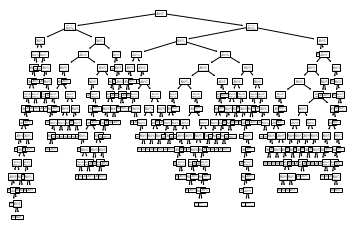

In [69]:
tree.plot_tree(clf)
[...]

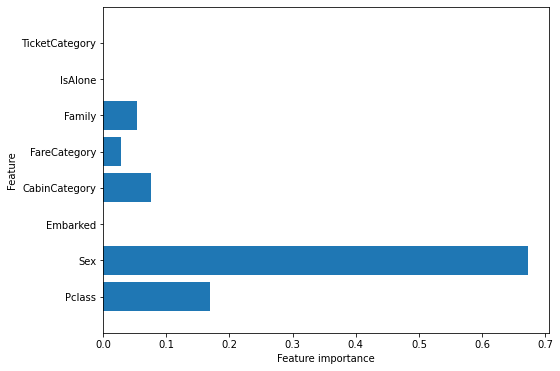

In [88]:
def plot_feature_importances(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(clf)

# Sex, Pclass, CabinCategory, Family, FareCategory가 중요하게 작용함을 알 수 있다

In [89]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

# n_estimators = 100 이 디폴트값
rf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit 함수 통해서 training시킴
rf.fit(x_train, y_train)
#training set과 test set에 대해서 성능 재본다
print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
#성능도 single과 똑같음

Accuracy on training set: 0.886


In [90]:
# max_depth = 3 --> 정확도 더 떨어짐
rf1 = RandomForestClassifier(max_features=2, max_depth=3, n_estimators=100, random_state=0)
rf1.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(x_train, y_train)))

Accuracy on training set: 0.806


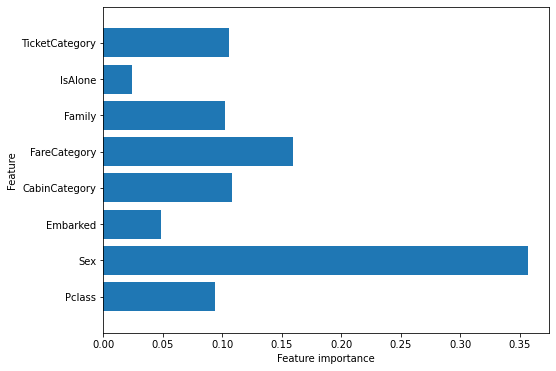

In [91]:
plot_feature_importances(rf)

In [92]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(x_train, y_train)))

Accuracy on training set: 0.848


In [93]:
# max_depth = 3
gb1 = GradientBoostingClassifier(random_state=0, max_depth=2) # by deafult 3 / max_depth 디폴트 3이지만, 2로 줄여서 overfitting 막음
gb1.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb1.score(x_train, y_train)))

Accuracy on training set: 0.832


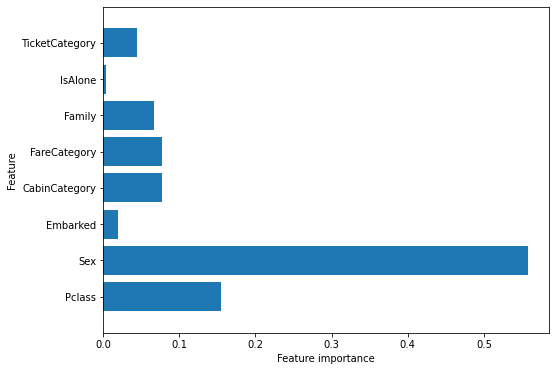

In [94]:
plot_feature_importances(gb)